# 5.1交叉验证

交叉验证是一种评估泛化性能的统计学方法，它比单次划分训练集和测试集的方法更加稳定全面。数据被多次划分，并且需要训练多个模型，最常用的是k折交叉验证

5.1.1sklearn中的交叉验证

In [3]:
import warnings;warnings.simplefilter('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris=load_iris()
lr=LogisticRegression()
scores=cross_val_score(lr,iris.data,iris.target,cv=5)
print(scores)
print(scores.mean())

[1.         0.96666667 0.93333333 0.9        1.        ]
0.9600000000000002


我们可以发现，折与折之间的精度有较大的变化，范围从100%-90%，这可能意味着模型强烈依赖于将某个折用于训练，也有可能是因为数据集的数据量太小

5.1.2交叉验证的优点

5.1.3分层k折交叉验证和其他策略

In [27]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

如果在这一数据集上进行3折交叉验证，3折交叉验证精度为0，由于简单的k折策略在这里失效了，所以sklearn在分类问题不使用这种策略，而是使用分层k折交叉验证，使得每个折中类别之间的比例与整个数据集中的比例相同

使用分层k折交叉验证而不是k折交叉验证来评估一个分类器，通常是一个好主意。
对于回归问题，sklearn默认使用标准k折交叉验证

5.1.3.1对交叉验证的更多控制

回归问题默认的k折交叉验证与分类问题的分层k折交叉验证的表现都很好，但有些情况下你可能希望使用不同的策略。
比如我们想要在分类数据集上使用标准k折交叉验证，我们就要导入KFold分离器类

In [5]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5)
scores=cross_val_score(lr,iris.data,iris.target,cv=kfold)
scores

array([1.        , 0.93333333, 0.43333333, 0.96666667, 0.43333333])

In [6]:
kfold=KFold(n_splits=3)
scores=cross_val_score(lr,iris.data,iris.target,cv=kfold)
scores

array([0., 0., 0.])

在iris数据集上使用3折交叉验证（不分层）确实是一个非常糟糕的主意。
可以通过KFold的shuffle参数来实现打乱来代替分层，还需要固定random_state以获得可以重复的打乱结果。

In [14]:
kfold=KFold(n_splits=3,shuffle=True,random_state=0)
scores=cross_val_score(lr,iris.data,iris.target,cv=kfold)
scores

array([0.9 , 0.96, 0.96])

5.1.3.2留一法交叉验证

每折只包含单个样本的k折交叉验证，对于大型数据集太耗时

In [15]:
from sklearn.model_selection import LeaveOneOut
loo=LeaveOneOut()
scores=cross_val_score(lr,iris.data,iris.target,cv=loo)
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [16]:
scores.mean()

0.9533333333333334

5.1.3.3打乱划分交叉验证

每次划分为训练集取样train_size个点，为测试集取样test_size个（不相交）点，将这一方法重复n_iter次


In [18]:
from sklearn.model_selection import ShuffleSplit
ss=ShuffleSplit(n_splits=10, random_state=0, test_size=0.5, train_size=0.5)
scores=cross_val_score(lr,iris.data,iris.target,cv=ss)
scores

array([0.84      , 0.93333333, 0.90666667, 1.        , 0.90666667,
       0.93333333, 0.94666667, 1.        , 0.90666667, 0.88      ])

能独立控制迭代次数，还允许使用部分数据，在大型数据上很有帮助

5.1.3.4分组交叉验证

对于分类其而言，检测训练集中出现过的人脸感情比全新的人脸要容易得多。因此为了准确评估模型对新的人脸的泛化能力，我们必须确保训练集和测试集中包含不同人的图像。
为了实现这一点，我们可以使用GroupKFold,它以group数组作为参数，可以用来说明照片中对应的是那个人

# 5.2网格搜索

学习如何通过调参来提升模型的泛化能力，sklearn中有一些标准方法可以帮你完成，最常用的方法就是网格搜索

5.2.1简单网格搜索

我们可以实现一个简单的网格搜索，在2个参数上使用for循环，对每种参数组合分别训练并评估一个分类器。

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)
best_score=0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for c in [0.001,0.01,0.1,1,10,100]:
        svm=SVC(gamma=gamma,C=c)
        svm.fit(x_train,y_train)
        score=svm.score(x_test,y_test)
        if score>best_score:
            best_score=score
            best_parameter={'c':c,'gamma':gamma}
print(best_score)
print(best_parameter)

0.9736842105263158
{'c': 100, 'gamma': 0.001}


5.2.2参数过拟合的风险与验证集

我们需要重新划分数据，我们得到3个数据集：用于构建模型的训练集，用于选择模型参数的验证集（开发集），用于评估所选参数性能的测试集。利用验证集选定最佳参数后，我们可以利用我们找到的参数设置重新构建一个模型，但是要同时在训练数据和验证数据上进行训练。

In [1]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
iris=load_iris()
from sklearn.model_selection import train_test_split
#将数据分为训练+验证集和测试集
x_trainval, x_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
#将数据分为训练和验证集
x_train,x_valid,y_train,y_valid= train_test_split(x_trainval, y_trainval, random_state=1)
best_score=0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for c in [0.001,0.01,0.1,1,10,100]:
        svm=SVC(gamma=gamma,C=c)
        svm.fit(x_train,y_train)
        score=svm.score(x_valid,y_valid)
        if score>best_score:
            best_score=score
            best_parameter={'c':c,'gamma':gamma}
print(best_score)
print(best_parameter)

0.9642857142857143
{'c': 10, 'gamma': 0.001}


In [34]:
#在训练+验证集上重新构建一个模型，并在测试集上进行评估
svm=SVC(gamma=0.001,C=10)
svm.fit(x_trainval,y_trainval)
score=svm.score(x_test,y_test)
score

0.9210526315789473

任何根据测试集精度所做的选择都会将测试集信息泄露到模型中，因此保留一个单独的测试集和有必要

5.2.3带交叉验证的网格搜索

In [35]:
best_score=0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for c in [0.001,0.01,0.1,1,10,100]:
        svm=SVC(gamma=gamma,C=c)
        
        scores=cross_val_score(svm,x_trainval,y_trainval,cv=5)
        score=scores.mean()
        if score>best_score:
            best_score=score
            best_parameter={'c':c,'gamma':gamma}
print(best_score)
print(best_parameter)

0.9726896292113683
{'c': 100, 'gamma': 0.01}


In [36]:
svm=SVC(gamma=0.01,C=100)
svm.fit(x_trainval,y_trainval)
svm.score(x_test,y_test)

0.9736842105263158

由于带交叉验证的网格搜索是一种常见的调参方法，因此sklearn提供了GridSearchCV类

In [37]:
param_grid={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100]}
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search=GridSearchCV(SVC(),param_grid,cv=5)
x_trainval, x_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
grid_search.fit(x_trainval,y_trainval).score(x_test,y_test)

0.9736842105263158

In [38]:
grid_search.best_score_
#交叉验证的平均精度

0.9732142857142857

In [39]:
grid_search.best_params_

{'C': 100, 'gamma': 0.01}

In [40]:
grid_search.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

5.2.3.1分析交叉验证结果

In [41]:
import pandas as pd
results=pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004401,0.005818,0.0006,4.899792e-04,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22
1,0.001400,0.000490,0.0006,4.899792e-04,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22
2,0.002200,0.001939,0.0008,4.000902e-04,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22
3,0.001200,0.000400,0.0006,4.899792e-04,0.001,1,"{'C': 0.001, 'gamma': 1}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22
4,0.000800,0.000400,0.0004,4.899792e-04,0.001,10,"{'C': 0.001, 'gamma': 10}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22
5,0.001800,0.000400,0.0000,0.000000e+00,0.001,100,"{'C': 0.001, 'gamma': 100}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22
6,0.000600,0.000490,0.0004,4.899792e-04,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22
7,0.000800,0.000400,0.0002,4.000664e-04,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22
8,0.000400,0.000490,0.0004,4.899792e-04,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22
9,0.000800,0.000400,0.0002,4.000664e-04,0.01,1,"{'C': 0.01, 'gamma': 1}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22


In [43]:
import numpy as np
scores=np.array(results.mean_test_score).reshape(6,6)
scores

array([[0.36607143, 0.36607143, 0.36607143, 0.36607143, 0.36607143,
        0.36607143],
       [0.36607143, 0.36607143, 0.36607143, 0.36607143, 0.36607143,
        0.36607143],
       [0.36607143, 0.69642857, 0.91964286, 0.95535714, 0.36607143,
        0.36607143],
       [0.69642857, 0.92857143, 0.96428571, 0.94642857, 0.91964286,
        0.50892857],
       [0.92857143, 0.96428571, 0.96428571, 0.9375    , 0.91964286,
        0.57142857],
       [0.96428571, 0.97321429, 0.95535714, 0.94642857, 0.91964286,
        0.57142857]])

In [56]:
scores=pd.DataFrame(scores)
scores.columns=param_grid['gamma']
scores.index=param_grid['C']
scores

,0.001,0.01,0.1,1.0,10.0,100.0
0.001,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071
0.010,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071
0.100,0.366071,0.696429,0.919643,0.955357,0.366071,0.366071
1.000,0.696429,0.928571,0.964286,0.946429,0.919643,0.508929
10.000,0.928571,0.964286,0.964286,0.937500,0.919643,0.571429
100.000,0.964286,0.973214,0.955357,0.946429,0.919643,0.571429


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text yticklabel objects>)

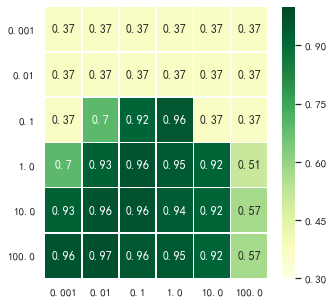

In [67]:
import matplotlib.pyplot as plt
>>> import numpy as np; np.random.seed(0)
>>> import seaborn as sns; sns.set()
plt.rcParams['font.sans-serif'] = ['SimHei']  # 解决中文显示问题-设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize']=[5,5]#设置图像尺寸
plt.xlabel='gamma'
plt.ylabel='C'
import pandas as pd
pd.set_option('display.float_format',lambda x : '%.2f' % x)
g=sns.heatmap(scores,vmin=0.3, vmax=1,cmap="YlGn",annot=True,linewidths=.5)
plt.yticks(rotation=360)

5.2.3.2在非网格的空间中搜索

在某些情况下，尝试参数的所有可能组合并不是一个好主意，SVC有一个kernel参数，如果kernel是linear，只会用到C参数，如果kernel是rbf，则需要使用kernel和C两个参数，这种情况下网格搜索就会浪费时间，此时可以字典组成列表

In [2]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search=GridSearchCV(SVC(),param_grid,cv=5)
x_trainval, x_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
grid_search.fit(x_trainval,y_trainval)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.9732142857142857


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [5]:
import pandas as pd
results=pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.0018,4.000902e-04,0.0002,0.00040,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,27
1,0.0012,7.484557e-04,0.0004,0.00049,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,27
2,0.0008,4.000902e-04,0.0002,0.00040,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,27
3,0.0008,4.001141e-04,0.0002,0.00040,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,27
4,0.0012,4.000664e-04,0.0002,0.00040,0.001,10,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,27
5,0.0010,9.536743e-08,0.0002,0.00040,0.001,100,rbf,"{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,27
6,0.0008,4.000902e-04,0.0002,0.00040,0.01,0.001,rbf,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,27
7,0.0006,4.899792e-04,0.0006,0.00049,0.01,0.01,rbf,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,27
8,0.0008,4.000664e-04,0.0002,0.00040,0.01,0.1,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,27
9,0.0008,4.000902e-04,0.0002,0.00040,0.01,1,rbf,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,27


In [6]:
results[results['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
31,0.0002,0.0004,0.0000,0.0000,100,0.01,rbf,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}",1.0,0.956522,1.0,0.954545,0.952381,0.973214,0.0224,1
39,0.0000,0.0000,0.0008,0.0004,1,NaN,linear,"{'C': 1, 'kernel': 'linear'}",1.0,0.956522,1.0,0.954545,0.952381,0.973214,0.0224,1


5.2.3.3使用不同的交叉验证策略进行网格搜索

我们可以不止将原始数据一次划分为训练集和测试集，而是使用交叉验证进行多次划分，这就是所谓的嵌套交叉验证

# 5.3评估指标与评分

5.3.2二分类指标

In [12]:
from sklearn.datasets import load_digits
digits=load_digits()
y=digits.target==9
y

array([False, False, False, ..., False,  True, False])

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=0.1).fit(x_train,y_train)
pred_lr=lr.predict(x_test)
lr.score(x_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9777777777777777

这里的问题在于，要想对这种不平衡数据的预测性能进行量化，精度并不是一种合适的度量

对于二分类问题的评估结果，一种最全面的表示方法是使用混淆矩阵confusion matrix

In [15]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,pred_lr)
confusion

array([[401,   2],
       [  8,  39]], dtype=int64)

其中行对应于真实的类别，列对应于预测的类别